In [3]:
# get helper functions
# ! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
from helper_functions import (
    create_tensorboard_callback,
    plot_loss_curves,
    unzip_data,
    walk_through_dir
)

# Experiment 0

In [5]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [7]:
# ! unzip 10_food_classes_10_percent.zip

In [8]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
IMG_SIZE = (224, 224)
TRAIN_DIR = "10_food_classes_10_percent/train"
TEST_DIR = "10_food_classes_10_percent/test"
BATCH_SIZE = 32

In [11]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                seed=42)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
type(train_data), type(test_data)

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 tensorflow.python.data.ops.dataset_ops.BatchDataset)

In [13]:
# image_dataset_from_directory creates batches of images

In [14]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [15]:
# see an example of a batch
for image,label in train_data.take(1):
  print(image)
  print(label)

tf.Tensor(
[[[[1.10000000e+02 6.32397957e+01 0.00000000e+00]
   [1.18780609e+02 7.49744949e+01 7.37755108e+00]
   [1.06168365e+02 6.54438782e+01 1.02551079e+00]
   ...
   [9.51429443e+01 5.70000000e+01 2.21426392e+00]
   [1.04714348e+02 6.15000267e+01 8.57146740e+00]
   [1.10357109e+02 6.33571091e+01 9.35710812e+00]]

  [[1.14693878e+02 7.08877563e+01 4.36224604e+00]
   [1.14423470e+02 7.30051041e+01 7.14285660e+00]
   [1.10346939e+02 7.12346954e+01 6.29081631e+00]
   ...
   [9.44694366e+01 5.59285736e+01 1.34179497e+00]
   [1.00285751e+02 5.70714264e+01 4.14286995e+00]
   [1.07311264e+02 5.74490089e+01 4.40309334e+00]]

  [[1.07239792e+02 6.82346954e+01 7.65306503e-02]
   [1.13382652e+02 7.48112259e+01 7.59694004e+00]
   [1.13469383e+02 7.48520432e+01 9.94387722e+00]
   ...
   [9.81888351e+01 5.96173630e+01 5.04589176e+00]
   [1.02857155e+02 5.68571548e+01 4.85715580e+00]
   [1.09576607e+02 5.95766068e+01 6.57660770e+00]]

  ...

  [[9.08060455e+01 6.93775177e+01 2.37751961e+00]
   [9

In [16]:
# model_0 -> using the functional API on 10% data without augumentation

# create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base model
base_model.trainable = False

# create inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer") 

# pass inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model is {x.shape}")

# average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after passing through global average pooling is {x.shape}")

# create outputs
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)  

# combine inputs and outputs to form a model
model_0 = tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model is (None, 7, 7, 1280)
Shape after passing through global average pooling is (None, 1280)


In [17]:
# train the model 
history_0 = model_0.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
24/24 [==============================] - 27s 473ms/step - loss: 1.8346 - accuracy: 0.4293 - val_loss: 1.2482 - val_accuracy: 0.7476
Epoch 2/5
24/24 [==============================] - 8s 335ms/step - loss: 1.0765 - accuracy: 0.7667 - val_loss: 0.8460 - val_accuracy: 0.8180
Epoch 3/5
24/24 [==============================] - 11s 458ms/step - loss: 0.7708 - accuracy: 0.8427 - val_loss: 0.6814 - val_accuracy: 0.8448
Epoch 4/5
24/24 [==============================] - 8s 323ms/step - loss: 0.6341 - accuracy: 0.8520 - val_loss: 0.6025 - val_accuracy: 0.8532
Epoch 5/5
24/24 [==============================] - 7s 300ms/step - loss: 0.5376 - accuracy: 0.8747 - val_loss: 0.5503 - val_accuracy: 0.8600


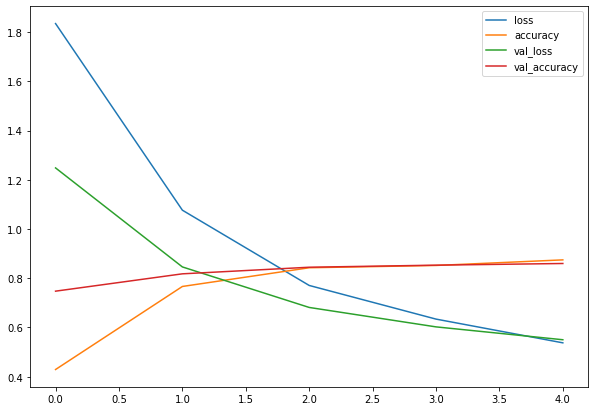

In [18]:
pd.DataFrame(history_0.history).plot(figsize=(10,7))
plt.show()

In [19]:
# check the layers of the model which we made
for index, layer in enumerate(model_0.layers):
  print(index, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7ff8844bef10>
1 <keras.engine.functional.Functional object at 0x7ff7ea055e20>
2 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ff7f13ee1c0>
3 <keras.layers.core.dense.Dense object at 0x7ff7e9bfd3a0>


In [20]:
# check the layers of the base_model
for index, layer in enumerate(base_model.layers):
  print(index, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7ff7f23e9c40>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7ff7f0159d60>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7ff7f00f51c0>
3 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7ff7f00f5b80>
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7ff7f00a3fd0>
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7f00a3eb0>
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff7f00a3d60>
7 <keras.layers.core.activation.Activation object at 0x7ff7f13c0460>
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7ff7f00a3940>
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff7f006ef70>
10 <keras.layers.core.activation.Activation object at 0x7ff7f00096a0>
11 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ff7f0013850>
12 <keras.l

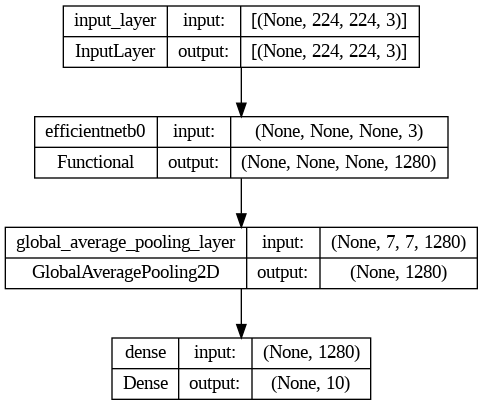

In [21]:
tf.keras.utils.plot_model(model_0, show_shapes=True)

# Experiment 1

In [22]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-02-27 14:35:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   163MB/s    in 0.8s    

2023-02-27 14:35:32 (163 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [23]:
! unzip 10_food_classes_1_percent.zip

Archive:  10_food_classes_1_percent.zip
   creating: 10_food_classes_1_percent/
  inflating: __MACOSX/._10_food_classes_1_percent  
   creating: 10_food_classes_1_percent/test/
  inflating: __MACOSX/10_food_classes_1_percent/._test  
   creating: 10_food_classes_1_percent/train/
  inflating: __MACOSX/10_food_classes_1_percent/._train  
   creating: 10_food_classes_1_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_1_percent/test/._ice_cream  
   creating: 10_food_classes_1_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_1_percent/test/._chicken_curry  
   creating: 10_food_classes_1_percent/test/steak/
  inflating: __MACOSX/10_food_classes_1_percent/test/._steak  
   creating: 10_food_classes_1_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_1_percent/test/._sushi  
   creating: 10_food_classes_1_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_1_percent/test/._chicken_wings  
   creating: 10_food_classes_1_percent/test/grilled_

In [24]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [25]:
IMG_SIZE = (224, 224)
TRAIN_DIR = "10_food_classes_1_percent/train"
TEST_DIR = "10_food_classes_1_percent/test"
BATCH_SIZE = 32

In [26]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                seed=42)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
# for data augumentation, use the experimental.preprocessing layer as it auguments on the GPU, unlike ImageDataGenerator which auguments on the CPU

In [36]:
# create data_augumentation stage
data_augumentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    # tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # no need for EfficientNetB0, required for Resnet
], name="data_augumentation")

In [37]:
# model_1 -> using the functional API on 1% data with augumentation

# setup base
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base 
base_model.trainable = False

# setup inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# add data augumentations
x = data_augumentation(inputs)

# pass data to base
x = base_model(x, training=False)

# add pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# setup outputs
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# make model
model_1 = tf.keras.Model(inputs, outputs)

# compile model
model_1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [38]:
# training the model
history_1 = model_1.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5


3/3 [==============================] - 25s 4s/step - loss: 2.3271 - accuracy: 0.1143 - val_loss: 2.2256 - val_accuracy: 0.1520
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.0702 - accuracy: 0.2286 - val_loss: 2.0975 - val_accuracy: 0.2432
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.8763 - accuracy: 0.3286 - val_loss: 1.9849 - val_accuracy: 0.3368
Epoch 4/5
3/3 [==============================] - 11s 5s/step - loss: 1.6896 - accuracy: 0.5286 - val_loss: 1.8828 - val_accuracy: 0.4240
Epoch 5/5
3/3 [==============================] - 12s 6s/step - loss: 1.5318 - accuracy: 0.6857 - val_loss: 1.7886 - val_accuracy: 0.4868


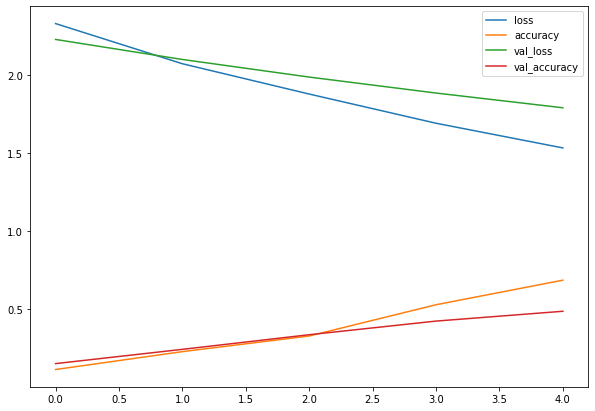

In [39]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))
plt.show()

# Experiment 2

In [42]:
IMG_SIZE = (224, 224)
TRAIN_DIR = "10_food_classes_10_percent/train"
TEST_DIR = "10_food_classes_10_percent/test"
BATCH_SIZE = 32

In [43]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                seed=42)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [44]:
# create data_augumentation stage
data_augumentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    # tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # no need for EfficientNetB0, required for Resnet
], name="data_augumentation")

In [45]:
# model_2 -> using the functional API on 10% data with augumentation

# setup base
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base 
base_model.trainable = False

# setup inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# add data augumentations
x = data_augumentation(inputs)

# pass data to base
x = base_model(x, training=False)

# add pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# setup outputs
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# make model
model_2 = tf.keras.Model(inputs, outputs)

# compile model
model_2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [46]:
# training the model
history_2 = model_2.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5


24/24 [==============================] - 33s 944ms/step - loss: 1.9566 - accuracy: 0.3787 - val_loss: 1.3800 - val_accuracy: 0.6700
Epoch 2/5
24/24 [==============================] - 16s 673ms/step - loss: 1.2852 - accuracy: 0.6827 - val_loss: 0.9725 - val_accuracy: 0.7840
Epoch 3/5
24/24 [==============================] - 17s 691ms/step - loss: 0.9811 - accuracy: 0.7707 - val_loss: 0.7758 - val_accuracy: 0.8176
Epoch 4/5
24/24 [==============================] - 15s 622ms/step - loss: 0.8243 - accuracy: 0.8013 - val_loss: 0.6754 - val_accuracy: 0.8320
Epoch 5/5
24/24 [==============================] - 15s 633ms/step - loss: 0.7304 - accuracy: 0.8120 - val_loss: 0.6114 - val_accuracy: 0.8416


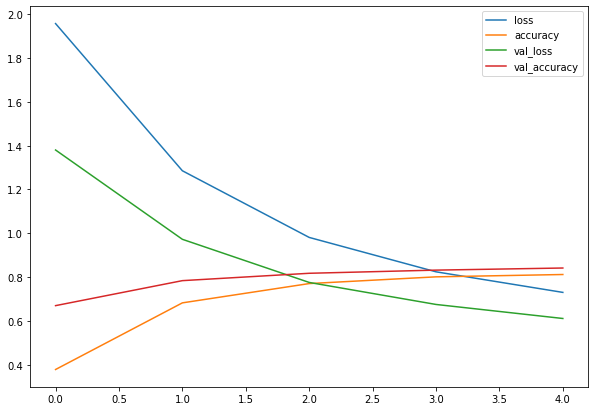

In [47]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))
plt.show()

# Experiment 3

In [48]:
IMG_SIZE = (224, 224)
TRAIN_DIR = "10_food_classes_10_percent/train"
TEST_DIR = "10_food_classes_10_percent/test"
BATCH_SIZE = 32

In [49]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                seed=42)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [50]:
# create data_augumentation stage
data_augumentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    # tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # no need for EfficientNetB0, required for Resnet
], name="data_augumentation")

In [58]:
# model_3 -> using the functional API on 10% data with augumentation and fine tuning

# setup base
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze layers of base except top 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# setup inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# add data augumentations
x = data_augumentation(inputs)

# pass data to base
x = base_model(x, training=False)

# add pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# setup outputs
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# make model
model_3 = tf.keras.Model(inputs, outputs)

# compile model
model_3.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [59]:
# training the model
history_3 = model_3.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5


24/24 [==============================] - 28s 746ms/step - loss: 1.2688 - accuracy: 0.5973 - val_loss: 0.5455 - val_accuracy: 0.8216
Epoch 2/5
24/24 [==============================] - 15s 632ms/step - loss: 0.4799 - accuracy: 0.8600 - val_loss: 0.4459 - val_accuracy: 0.8524
Epoch 3/5
24/24 [==============================] - 14s 575ms/step - loss: 0.3161 - accuracy: 0.8920 - val_loss: 0.5191 - val_accuracy: 0.8316
Epoch 4/5
24/24 [==============================] - 14s 592ms/step - loss: 0.2161 - accuracy: 0.9267 - val_loss: 0.4791 - val_accuracy: 0.8456
Epoch 5/5
24/24 [==============================] - 15s 609ms/step - loss: 0.1369 - accuracy: 0.9640 - val_loss: 0.4737 - val_accuracy: 0.8552


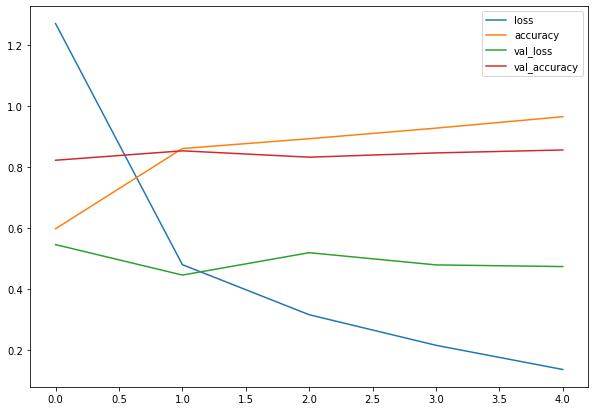

In [60]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))
plt.show()